# libs

## install

In [1]:
!pip install opendatasets

## import

In [2]:
import torch as tr
import pandas as pd
import numpy as np
import scipy as scp
import datetime as dt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import opendatasets as od

from matplotlib import pyplot as plt
import seaborn as sns

od.download("https://www.kaggle.com/competitions/hotel-booking-demand-3/data")

Skipping, found downloaded files in "./hotel-booking-demand-3" (use force=True to force download)


# load data

In [3]:
test = pd.read_csv("/content/hotel-booking-demand-3/test_final.csv")
train = pd.read_csv("/content/hotel-booking-demand-3/train_final.csv")

In [4]:
print(train.shape)
print(test.shape);

(44638, 29)
(23525, 28)


In [5]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [6]:
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14


# eda

In [7]:
print("Number of NA values in train dataset")
train.isna().sum()

Number of NA values in train dataset


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [9]:
train["is_canceled"].value_counts(normalize=True)

0    0.702406
1    0.297594
Name: is_canceled, dtype: float64

<ipython-input-10-a046dbcfe7af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_canceled",data=is_canceled, palette='Paired')


<Axes: xlabel='is_canceled', ylabel='count'>

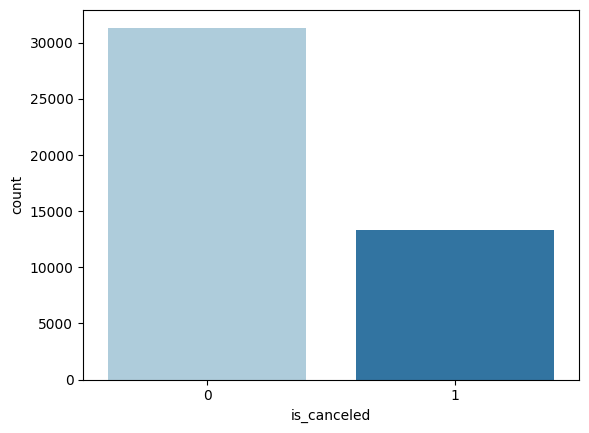

In [10]:
is_canceled=pd.DataFrame(train["is_canceled"])

sns.countplot(x="is_canceled",data=is_canceled, palette='Paired')

<ipython-input-11-f5f93f9a1aa5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(train.corr())


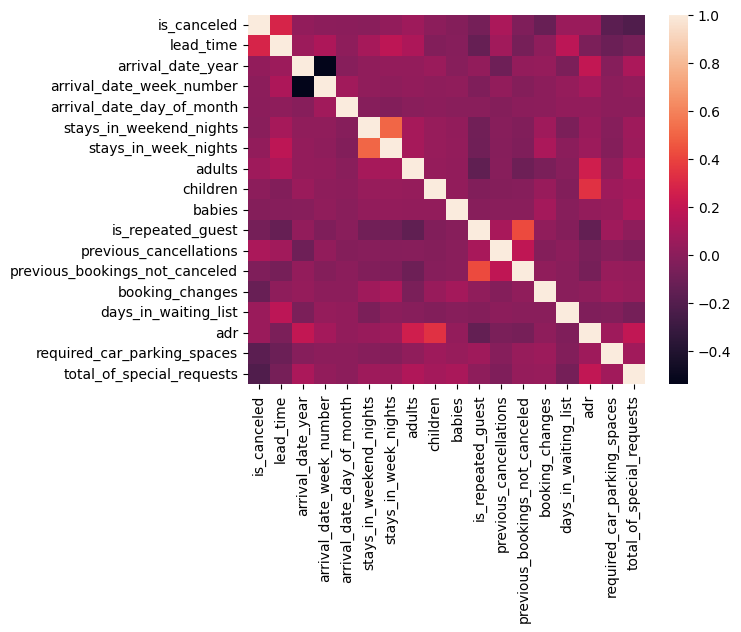

In [11]:
dataplot = sns.heatmap(train.corr())
plt.show()

# data preprocessing

In [12]:
class HotelDataTransform:
    def __init__(self):
        self.le_cont = {}
        self.MNscaler = preprocessing.MinMaxScaler()

    def fit_transform(self, data:pd.DataFrame):

        categorical = data.loc[:, data.dtypes==object].columns

        for column in categorical:
            le = preprocessing.LabelEncoder()
            data[column] = le.fit_transform(data[column])
            self.le_cont[column] = le

        data = pd.DataFrame(self.MNscaler.fit_transform(data), columns = data.columns)

        return data

    def transform(self, data:pd.DataFrame):

        categorical = data.loc[:, data.dtypes==object].columns

        for column in categorical:
            le = self.le_cont[column]
            data[column] = le.fit_transform(data[column])
            self.le_cont[column] = le

        data = pd.DataFrame(self.MNscaler.fit_transform(data), columns = data.columns)

        return data

In [13]:
def extract_and_preprocess_hotel_data(path, DataTransformer, is_test = False):
    transformer = DataTransformer()
    raw_train = pd.read_csv(path)
    # raw_train = raw_train.drop(columns=[
    #     'reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'
    # ])



    train:pd.DataFrame = transformer.fit_transform(raw_train)

    if not is_test:
        fts_train_all = train.drop(columns=['is_canceled'])
        target_all = train['is_canceled']

        fts_train, fts_test, target_train, target_test = train_test_split(fts_train_all,
                                                                      target_all,
                                                                      shuffle=True,
                                                                      train_size = 0.75,
                                                                      random_state=42)

        return fts_train, fts_test, target_train, target_test

    return train

In [14]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

class DataCont(Dataset):
    def __init__(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy()

        self.X = tr.from_numpy(X).float()
        self.y = tr.from_numpy(y).float()

    def __len__(self) -> int:
        return self.X.shape[0]

    def __str__(self):
        return f"Features: {self.X} \nTargets: {self.y}"

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [15]:
class TestDataCont(Dataset):
    def __init__(self, X):
        X = X.to_numpy()

        self.X = tr.from_numpy(X).float()

    def __len__(self) -> int:
        return self.X.shape[0]

    def __str__(self):
        return f"Features: {self.X}"

    def __getitem__(self, index):
        return self.X[index]

# train model

In [16]:
class ReLUNet(nn.Module):
    def __init__(self, entry_neurons, hidden_layer_neurons):
        super().__init__()
        self.entry = nn.Linear(entry_neurons,hidden_layer_neurons)
        self.lin_1 = nn.Linear(hidden_layer_neurons, hidden_layer_neurons)
        self.lin_2 = nn.Linear(hidden_layer_neurons,hidden_layer_neurons)
        self.fin = nn.Linear(hidden_layer_neurons, 1)

    def forward(self, x):
        x = self.entry(x)
        x = tr.nn.functional.relu(x)
        x = self.lin_1(x)
        x = tr.nn.functional.relu(x)
        x = self.lin_2(x)
        x = tr.nn.functional.relu(x)
        x = self.fin(x)
        x = tr.nn.functional.softmax(tr.nn.functional.sigmoid(x), dim=1)
        return x

In [17]:
class Trainer():
    """
    Parameters:
        dataset: класс, хранящий данные
        loss_f: функция потерь
        learning_rate: величина градиентного шага
        epoch_amount: общее количество эпох
        batch_size: размер одного бача
        max_batches_per_epoch: максимальное количество бачей,
                               подаваемых в модель в одну эпоху
        device: устройство для вычислений
        early_stopping: количество эпох без улучшений до остановки обучения
        optim: оптимизатор
        scheduler: регулятор градиентного шага
        permutate: перемешивание тренировочной выборки перед обучением

    Attributes:
        start_model: необученная модель
        best_model: модель, после обучения
        train_loss: средние значения функции потерь на тренировочных
                    данных в каждой эпохе
        val_loss: средние значения функции потерь на валидационных
                  данных в каждой эпохе

    Methods:
        fit: обучение модели
        predict: возвращает предсказание обученной моделью

    """

    # это классический конструктор класса, он учитывает много различных
    # параметров, часть из которых задаётся по умолчанию
    def __init__(self,  dataset, net, loss_f, learning_rate=1e-3,
                epoch_amount=10, batch_size=300,
                max_batches_per_epoch=None,
                device='cpu', early_stopping=10,
                optim=tr.optim.Adam,
                scheduler=None, permutate=True):

        self.loss_f = loss_f
        self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount
        self.batch_size = batch_size
        self.max_batches_per_epoch = max_batches_per_epoch
        self.device = device
        self.early_stopping = early_stopping
        self.optim = optim
        self.scheduler = scheduler
        self.permutate = permutate
        self.dataset = dataset
        self.start_model = net
        self.best_model = net

        self.train_loss = []
        self.val_loss = []

    # метод используется для предсказания значения, выбирает лучшую модель
    # из ранее обученных
    def predict(self, X):
        return self.best_model(X)

    # большой метод для тренировки
    # вообще говоря, его можно было разбить ещё на один метод, описывающий
    # тренировку одно отдельной эпоих
    def fit(self, X_train, X_test, y_train, y_test):

        Net = self.start_model # берём исходную модель

        device = tr.device(self.device)

        Net.to(self.device) # переносим модель на видеокарту

        # задаём оптимизатор
        optimizer = self.optim(Net.parameters(), lr=self.learning_rate)

        # расписание изменения (уменьшения) скорости изменения и его шаг
        if self.scheduler is not None:
            scheduler = self.scheduler(optimizer)

        # создаём из данных dataset и загрузчик
        train = self.dataset(X_train, y_train)
        val = self.dataset(X_test, y_test)

        train = DataLoader(train, batch_size=self.batch_size, shuffle=self.permutate)
        val = DataLoader(val, batch_size=self.batch_size, shuffle=False)

        best_val_loss = float('inf') # Лучшее значение функции потерь на валидационной выборке
                                     # функции потерь на валидационной выборке
        best_ep = 0                  # Эпоха, на которой достигалось лучшее
                                     # значение функции потерь на валидационной выборке

        # начинаем обучение по эпохам
        for epoch in range(self.epoch_amount):
            start = dt.datetime.now()
            print(f'Эпоха: {epoch}', end=' ')
            Net.train() # переводим сеть в режим обучения
            mean_loss = 0
            batch_n = 0

            # разбиваем данные на признаки и значения
            for batch_X, target in train:
                if self.max_batches_per_epoch is not None:
                    if batch_n >= self.max_batches_per_epoch:
                        break

                # обнуляем градиенты
                optimizer.zero_grad()

                # переносим данные на карточку
                batch_X = batch_X.to(self.device)
                target = target.to(self.device)

                # предсказываем значения
                predicted_values = Net(batch_X)
                loss = self.loss_f(predicted_values, target.reshape(predicted_values.shape))
                loss.backward() # считаем градиенты
                optimizer.step() # меняем значения весов

                mean_loss += float(loss)
                batch_n += 1

            mean_loss /= batch_n # считаем средний loss по батчам
            self.train_loss.append(mean_loss)
            print(f'Loss_train: {mean_loss}, {dt.datetime.now() - start} сек')

            Net.eval() # переводим модель в режим оценки
            mean_loss = 0
            batch_n = 0

            with tr.no_grad():
                for batch_X, target in val:
                    if self.max_batches_per_epoch is not None:
                        if batch_n >= self.max_batches_per_epoch:
                            break
                batch_X = batch_X.to(self.device)
                target = target.to(self.device)

                predicted_values = Net(batch_X)
                loss = self.loss_f(predicted_values, target.reshape(predicted_values.shape))

                mean_loss += float(loss)
                batch_n += 1

            mean_loss /= batch_n
            self.val_loss.append(mean_loss)
            print(f'Loss_val: {mean_loss}')

            # вводим механимз ранней остановки
            if mean_loss < best_val_loss:
                self.best_model = Net
                best_val_loss = mean_loss
                best_ep = epoch
            elif epoch - best_ep > self.early_stopping:
                print(f'{self.early_stopping} без улучшений. Прекращаем обучение...')
                break
            if self.scheduler is not None:
                scheduler.step()
            print()

In [18]:
class NnClassifier:
    def __init__(self,  dataset, network, loss_f,
                learning_rate=1e-5,
                epoch_amount=100,
                batch_size=500,
                optim=tr.optim.Adam,
                scheduler=None,
                permutate=True):

        self.loss_f = loss_f
        self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount
        self.batch_size = batch_size
        self.device = None
        self.optim = optim
        self.scheduler = scheduler
        self.permutate = permutate

        self.dataset = dataset
        self.model = network

        self.train_loss = []

    def predict(self, X):
        return self.model(X)

    def fit(self, X, y):
        dataset = self.dataset(X,y)
        train_data_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=self.permutate)

        self.device = tr.device("cuda:0" if tr.cuda.is_available() else "cpu")

        self.model = self.model.to(self.device)

        opt = self.optim(self.model.parameters(), lr=self.learning_rate)
        sch = tr.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.1)

        best_val_loss = float("inf")
        best_epoch = 0

        for epoch in range(self.epoch_amount):

            start = dt.datetime.now()

            loss_train = self.__train_epoch(self.model, opt, train_data_loader, sch)

            delta = dt.datetime.now() - start
            print(f"Epoch number: {epoch}")
            print(f"Time: {delta}")
            print(f"Train Loss function value: {loss_train}")

    def __train_epoch(self, network, opt, train, sch):
        network.train()

        sch.step()
        mean_loss = 0
        batch_counter = 0

        for X_batch, y_batch in train:

            X_batch = X_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            opt.zero_grad()

            curr_pred_y = network(X_batch)
            loss = self.loss_f(curr_pred_y, y_batch.reshape(curr_pred_y.shape))
            loss.backward()
            opt.step()

            mean_loss += float(loss)
            batch_counter += 1

        mean_loss /= batch_counter
        self.train_loss.append(mean_loss)

        network.eval()

        return mean_loss

In [19]:
fts_train, fts_test, target_train, target_test  = extract_and_preprocess_hotel_data("/content/hotel-booking-demand-3/train_final.csv", HotelDataTransform)
net = ReLUNet(28, 54)



params = {
    'dataset': DataCont,
    'network': net,
    'epoch_amount': 200,
    'learning_rate': 1e-4,
    'loss_f': nn.BCELoss(),
    'optim': tr.optim.SGD,
}

clf = NnClassifier(**params)
clf.fit(fts_train, target_train)

In [34]:
# fts_train, fts_test, target_train, target_test  = extract_and_preprocess_hotel_data("/content/hotel-booking-demand-3/train_final.csv", HotelDataTransform)
# net = ReLUNet(28, 50)

# params = {
#     'dataset': DataCont,
#     'net': net,
#     'epoch_amount': 1000,
#     'learning_rate': 1e-5,
#     'early_stopping': 50,
#     'loss_f': nn.BCELoss(),
#     'optim': tr.optim.SGD,
#     'device': 'cuda:0'
# }

# clf = Trainer(**params)
# clf.fit(fts_train, fts_test, target_train, target_test)

Эпоха: 0 Loss_train: 70.30430977685111, 0:00:00.562406 сек
Loss_val: 75.00000762939453

Эпоха: 1 Loss_train: 70.32062874521527, 0:00:00.531321 сек
Loss_val: 75.00000762939453

Эпоха: 2 Loss_train: 70.3267480986459, 0:00:00.690152 сек
Loss_val: 75.00000762939453

Эпоха: 3 Loss_train: 70.3206284386771, 0:00:00.537095 сек
Loss_val: 75.00000762939453

Эпоха: 4 Loss_train: 70.3083894593375, 0:00:00.365957 сек
Loss_val: 75.00000762939453

Эпоха: 5 Loss_train: 70.31858886991229, 0:00:00.380017 сек
Loss_val: 75.00000762939453

Эпоха: 6 Loss_train: 70.29818991252354, 0:00:00.385048 сек
Loss_val: 75.00000762939453

Эпоха: 7 Loss_train: 70.33898741858346, 0:00:00.370648 сек
Loss_val: 75.00000762939453

Эпоха: 8 Loss_train: 70.32470832552228, 0:00:00.547955 сек
Loss_val: 75.00000762939453

Эпоха: 9 Loss_train: 70.31654902866909, 0:00:00.377616 сек
Loss_val: 75.00000762939453

Эпоха: 10 Loss_train: 70.31042889186314, 0:00:00.530716 сек
Loss_val: 75.00000762939453

Эпоха: 11 Loss_train: 70.314509051

In [40]:
test_dataset = DataCont(fts_test, target_test)
test_X = test_dataset.X.to(clf.device)
test_y = test_dataset.y.to(clf.device)
pred = clf.predict(test_X)

ty = np.array(test_y.cpu())
pr = np.array(pred.detach().cpu().flatten())

accuracy_score(ty, pr)

0.29982078853046595

In [39]:
pd.DataFrame(pr).value_counts(), pr.shape

(1.0    23525
 dtype: int64,
 (23525,))

In [35]:
test_dataset = TestDataCont(
    extract_and_preprocess_hotel_data("/content/hotel-booking-demand-3/test_final.csv",
                                      HotelDataTransform, is_test=True)
    )
test_X = test_dataset.X.to(clf.device)
pred = clf.predict(test_X)

pred
pr = np.array(pred.detach().cpu().flatten())
pr

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [23]:
# with open("output.csv", "w") as out_f:
#     out_f.writelines("index,is_canceled\n")
#     for ind, res in enumerate(pr):
#         out_f.writelines(f"{ind},{res}\n")

In [24]:
# safe_path = "/content/model.pt"
# tr.save(clf.model.state_dict(), safe_path)

In [25]:
# model_scripted = tr.jit.script(clf.model)
# model_scripted.save('model_scripted.pt')